**Executive summary**

The principal regions, São Paulo and Rio de Janeiro, represent over 50% of total revenue, while the other 24 states constitute the remaining 50%. Revenue shows a very strong correlation with customer base, but high revenue regions have a tendency for smaller AOVs. This suggests urban customers make smaller, more frequent purchases while rural customers place larger, less frequent orders. Delivery strategies should be adjusted accordingly: prioritize speed and convenience in urban areas, and focus on reliability and bulk shipment efficiency in rural regions.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv

We start the analysis by observing monthly revenue. 

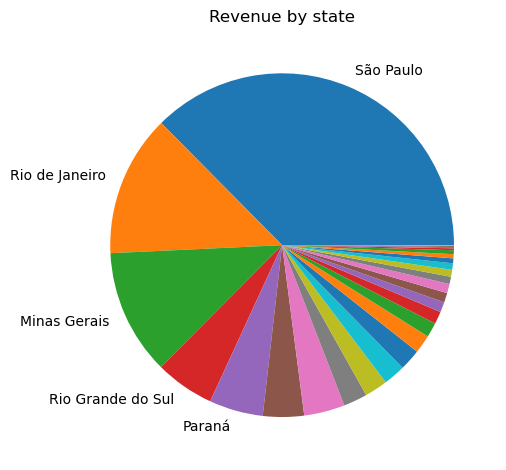

In [2]:
# Define the relative path to the directory containing derived datasets
# Using a variable makes it easier to change paths consistently across the notebook
path = './../data/derived/'

# Load monthly revenue data from CSV into a pandas DataFrame
df_state = pd.read_csv('./../data/raw/brazil_states.csv')


df1 = pd.read_csv(path + 'geographic_revenue_distribution.csv')
df1 = pd.merge(df1, df_state, on='state')

#For visual clarity, we only show the names of states that represent at least 5% of total revenue
df1['labels'] = ''
df1.loc[df1['revenue'] / df1['revenue'].sum() >= 0.05, 'labels'] = df1['state_name']

plt.pie(df1['revenue'], labels=df1['labels'])
plt.title('Revenue by state')
plt.tight_layout()
plt.show()

São Paulo and Rio de Janeiro represent approximately 50% of total revenue, where São Paulo constitutes a third of total revenue. Minas Genais is thirds revenue-producing state with a percentage similar to Rio de Janeiro's. The remaining revenue is due to the other brazilian state, that in many cases, represent less than 1% of total revenue. Now we analyze the customer number per state.

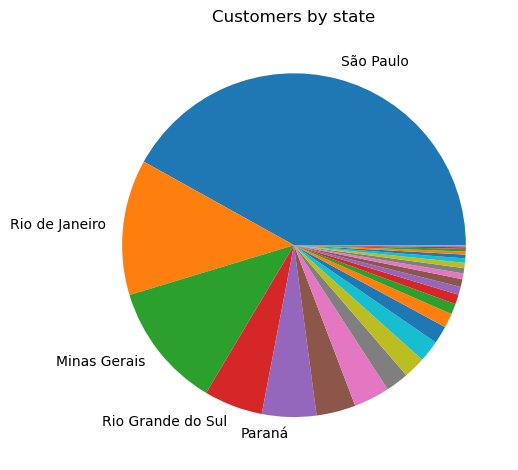

In [3]:
df2 = pd.read_csv(path + 'customers_by_state.csv')
df2 = pd.merge(df2, df_state, on='state')

#For visual clarity, we only show the names of states that represent at least 5% of total customers
df2['labels'] = ''
df2.loc[df2['customers'] / df2['customers'].sum() >= 0.05, 'labels'] = df2['state_name']

plt.pie(df2['customers'], labels=df2['labels'])
plt.title('Customers by state')
plt.tight_layout()
plt.show()

Customer distribution is consistent with revenue by state. São Paulo, Rio de Janeiro, and Minas Genais stand as the three highest states in both metric with similar percentages. This trends continues for all states. To confirm the relationship, we evaluate the correlation between both variables.

In [4]:
df3 = pd.merge(df1, df2, on='state')

df3[['revenue', 'customers']].corr()

,revenue,customers
revenue,1.000000,0.998501
customers,0.998501,1.000000


The correlation value is approximately 1, which confirms the strong relationship between both variables. |To further the geographic analysis, we include average order value (AOV) by state.

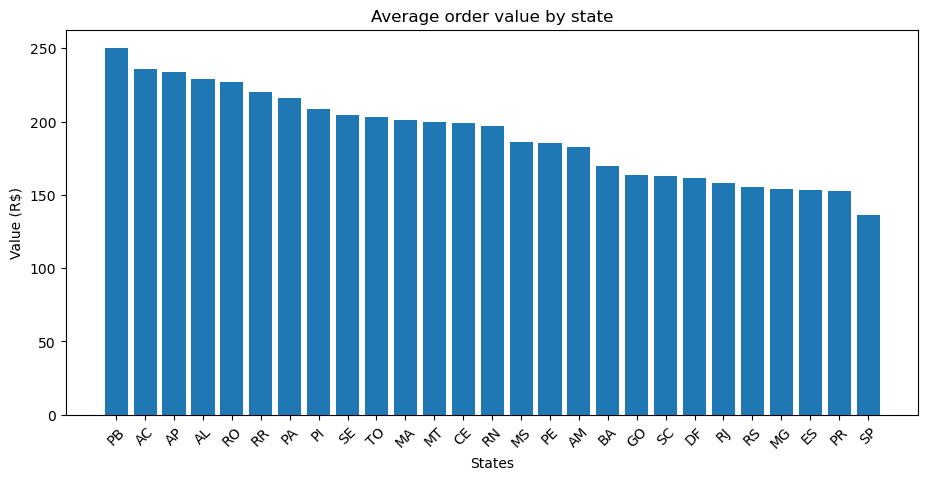

In [5]:
df4 = pd.read_csv(path + 'AOV_by_state.csv')
fig, ax = plt.subplots(figsize=(11, 5))
ax.bar(df4['state'], df4['avg_order_value'])
plt.title('Average order value by state')
plt.xticks(rotation=45)
plt.ylabel('Value (R$)')
plt.xlabel('States')
plt.show()

In [6]:
df5 = pd.merge(df4, df_state, on = 'state')
print('States with the highest AOV \n', df5.head())
print('\nStates with the lowest AOV \n', df5.tail())

States with the highest AOV 
   state  avg_order_value state_name
0    PB       250.153630    Paraíba
1    AC       235.978916       Acre
2    AP       233.939275      Amapá
3    AL       229.186837    Alagoas
4    RO       226.994821   Rondônia

States with the lowest AOV 
    state  avg_order_value         state_name
22    RS       155.447763  Rio Grande do Sul
23    MG       154.123823       Minas Gerais
24    ES       153.618303     Espírito Santo
25    PR       152.450682             Paraná
26    SP       136.387118          São Paulo


Interestingly, São Paulo has the lower AOV of any state despite being the highest contributor to total revenue. Similarly, Minas Gerais and Rio Grande do Sul also have bottom five AOVs even though they are among the top five states by revenue and customer base. Meanwhile, none of the states with the highest AOV represent a considerable fraction of total revenue. Given this data, we hipotesize that customer base and revenue have a negative relationship with AOV. To check this relationship, we evaluate correlation between customer base and AOV.

In [7]:
df5 = pd.merge(df2, df4, on='state')
df5[['avg_order_value', 'customers']].corr()

,avg_order_value,customers
avg_order_value,1.000000,-0.559595
customers,-0.559595,1.000000


The negative correlation value (aprox -0.56) indicates that regions with a lower customer base do have noticeable tendency to have higher AOV.